## Add redshift errors to the cubicBox

In [11]:
import os
import sys
import fitsio
import numpy as np
from astropy.table import Table

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 12
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sys.path.append('../')
from helper import REDSHIFT_VSMEAR, REDSHIFT_CUBICBOX
from Y3_redshift_systematics import vsmear, vsmear_modelling

['x', 'y', 'z', 'vx', 'vy', 'vz', 'mass', 'id', 'cen', 'vz_dv', 'z_dv']
2982225
load /global/cfs/projectdirs/desi/users/jiaxiyu/repeated_observations/EDR_vs_Y3/LSS-scripts_repeats/ELG_z0.8-1.1_CDF.npz to add redshift uncertainties and catastrophics


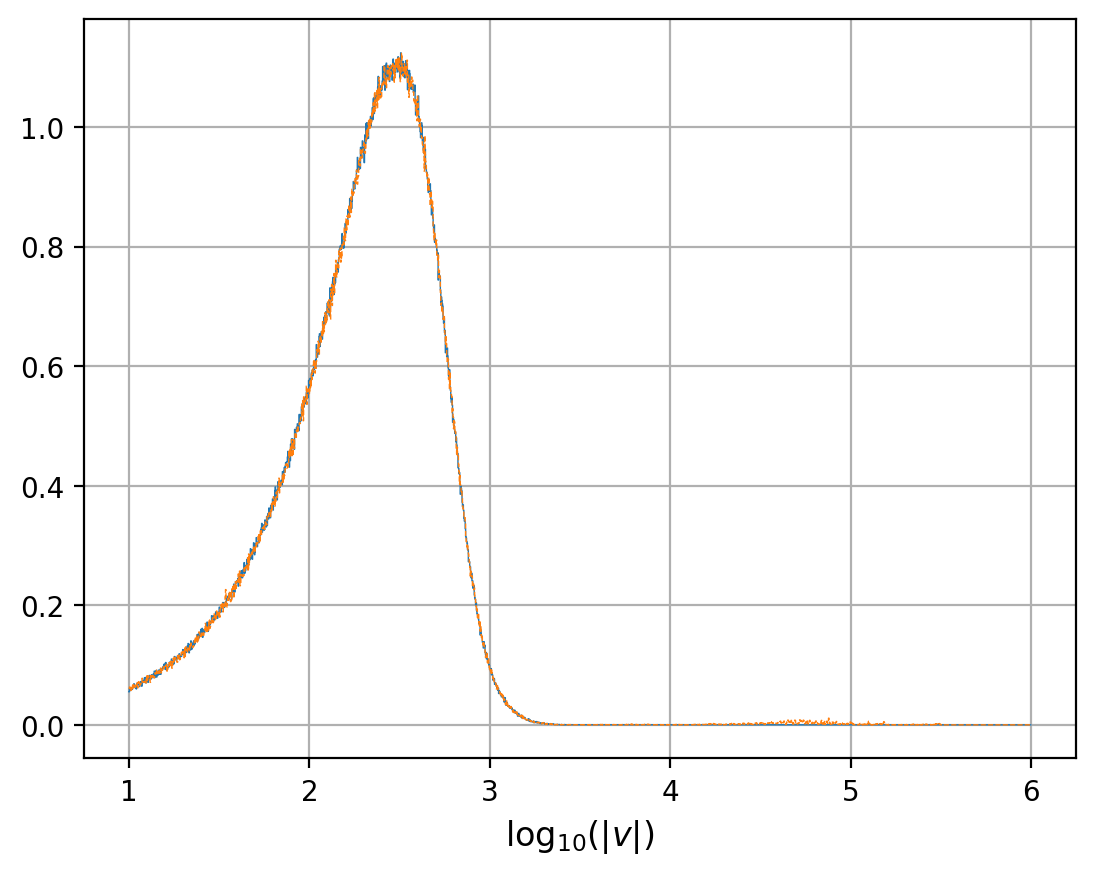

In [12]:
tracer = 'LRG'
z = 0.800
z_cutbox = f'{z:.3f}'
boxsize = 2000.

cubic_mock_fn = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}/z{z_cutbox}/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_lrg_main_z0.8_velbias_B_s_mockcov.fits'
catalog=Table(fitsio.read(cubic_mock_fn))
print(catalog.colnames)
print(len(catalog))

vz_rsd = catalog['vz']
dv = vsmear('ELG', zmin=0.8, zmax=1.1, Ngal = len(catalog))
vz_rsd_dv = vz_rsd+dv

bins = np.linspace(1, 6, 2000)

n1, bin_edges = np.histogram(np.log10(abs(vz_rsd)), bins=bins, density= True)
n2, bin_edges = np.histogram(np.log10(abs(vz_rsd_dv)), bins=bins, density= True)

plt.plot(bin_edges[:-1], n1, drawstyle='steps-post', lw=0.5)
plt.plot(bin_edges[:-1], n2, drawstyle='steps-post', ls='--', lw=0.5)
plt.grid(True)
plt.xlabel(r'$\log_{10}(|v|)$')
plt.show()

In [ ]:
from cosmoprimo.fiducial import AbacusSummit

boxsize = 2000.
cosmo = AbacusSummit()

tracers = ['ELG','QSO']

# catalog_rsd_xi2d_elg_z0.8_velbias_B_s_mockcov.fits 
# catalog_rsd_xi2d_lrg_main_z0.5_velbias_B_s_mockcov.fits
# catalog_rsd_xi2d_qso_z0.8_velbias_B_s_mockcov_zerr_skip5.fits

for tracer in tracers:
    for z_index,(zmin, zmax) in enumerate(REDSHIFT_VSMEAR[tracer]):
        z_cubic = REDSHIFT_CUBICBOX[tracer][z_index]
        z_dir = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}'
        for i in range(0,25):
            id =  f"{i:03}"
            if not os.path.exists(z_dir + f'/obs_z{zmin:.1f}-{zmax:.1f}/'):
                os.mkdir(z_dir + f'/obs_z{zmin:.1f}-{zmax:.1f}/')
            if not os.path.exists(z_dir + f'/obs_z{zmin:.1f}-{zmax:.1f}/AbacusSummit_base_c000_ph{id}/'):
                os.mkdir(z_dir + f'/obs_z{zmin:.1f}-{zmax:.1f}/AbacusSummit_base_c000_ph{id}/') 
            save_fn = z_dir+f'/obs_z{zmin:.1f}-{zmax:.1f}/AbacusSummit_base_c000_ph{id}/catalog_rsd_xi2d_{tracer}_z{zmin:.1f}-{zmax:.1f}_velbias_B_s_mockcov.fits'
            # if not os.path.exists(save_fn):
            if tracer == 'LRG':
                catalog_fn = z_dir+f'/z{z_cubic:.3f}/AbacusSummit_base_c000_ph{id}/catalog_rsd_xi2d_lrg_main_z{z_cubic:.1f}_velbias_B_s_mockcov.fits'
            if tracer == 'ELG':
                catalog_fn = z_dir+f'/z{z_cubic:.3f}/AbacusSummit_base_c000_ph{id}/catalog_rsd_xi2d_elg_z{z_cubic:.1f}_velbias_B_s_mockcov.fits'
            if tracer == 'QSO':
                catalog_fn = z_dir+f'/z{z_cubic:.3f}/AbacusSummit_base_c000_ph{id}/catalog_rsd_xi2d_qso_z{z_cubic:.1f}_velbias_B_s_mockcov_zerr_skip5.fits'
            catalog=Table(fitsio.read(catalog_fn))
            # if 'vz_dv' not in catalog.colnames:
            catalog['z_dv'] = catalog['z'].copy()
            catalog['vz_dv'] = catalog['vz'].copy()
            dv = vsmear(tracer, zmin=zmin, zmax=zmax, Ngal = len(catalog), seed=z_index*10+i*100+1234)
            catalog['vz_dv'] += dv
            zmid = (zmin+zmax)/2
            Hz = cosmo.H0*cosmo.efunc(zmid)
            catalog['z_dv'] += dv*(1+zmid)/Hz
            catalog['z_dv'] = catalog['z_dv']%boxsize-boxsize/2.0
            catalog.write(save_fn, overwrite=True)
            print(f'save to {save_fn}')

load /global/cfs/projectdirs/desi/users/jiaxiyu/repeated_observations/EDR_vs_Y3/LSS-scripts_repeats/ELG_z0.8-1.1_CDF.npz to add redshift uncertainties and catastrophics
save to /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_ELG_z0.8-1.1_velbias_B_s_mockcov.fits
load /global/cfs/projectdirs/desi/users/jiaxiyu/repeated_observations/EDR_vs_Y3/LSS-scripts_repeats/ELG_z0.8-1.1_CDF.npz to add redshift uncertainties and catastrophics
save to /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_base_c000_ph001/catalog_rsd_xi2d_ELG_z0.8-1.1_velbias_B_s_mockcov.fits
load /global/cfs/projectdirs/desi/users/jiaxiyu/repeated_observations/EDR_vs_Y3/LSS-scripts_repeats/ELG_z0.8-1.1_CDF.npz to add redshift uncertainties and catastrophics
save to /pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/ELG/obs_z0.8-1.1/AbacusSummit_bas

/tmp/ipykernel_1303410/2248223313.py:7: RuntimeWarning: divide by zero encountered in log10
  logdv = np.log10(abs(dv))
/tmp/ipykernel_1303410/2248223313.py:19: RuntimeWarning: divide by zero encountered in log10
  logdv = np.log10(abs(dv))
/tmp/ipykernel_1303410/2248223313.py:31: RuntimeWarning: divide by zero encountered in log10
  logdv = np.log10(abs(dv))


Text(0.5, 0, '$\\log_{10}(|\\Delta v|)$')

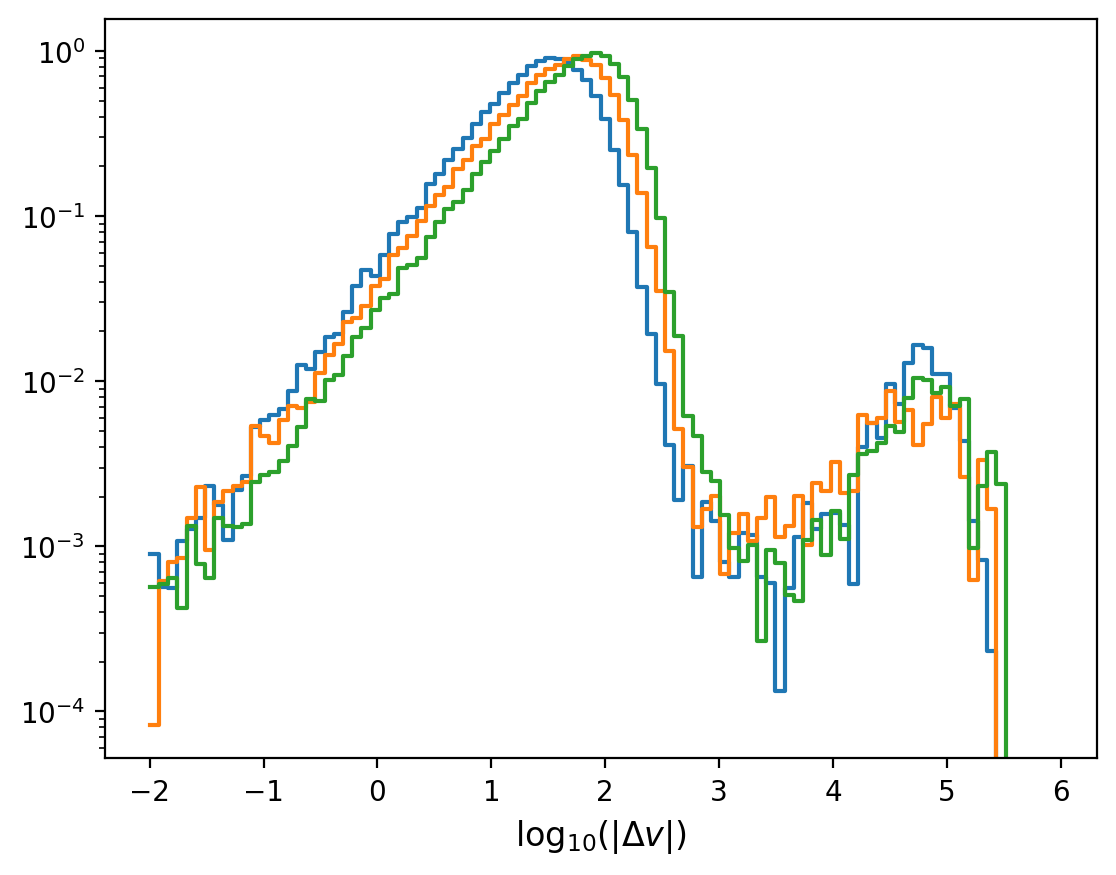

In [48]:
tracer = 'LRG'
(zmin, zmax) = REDSHIFT_VSMEAR[tracer][0]
fn = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}/obs_z{zmin}-{zmax}/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_{tracer}_z{zmin}-{zmax}_velbias_B_s_mockcov.fits'
catalog=Table(fitsio.read(fn))

dv = catalog['vz_dv']- catalog['vz']
logdv = np.log10(abs(dv))

n1, bin_edges = np.histogram(logdv, bins=np.linspace(-2, 6, 100), density= True)

plt.semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
plt.xlabel(r'$\log_{10}(|v|)$')

(zmin, zmax) = REDSHIFT_VSMEAR[tracer][1]
fn = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}/obs_z{zmin}-{zmax}/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_{tracer}_z{zmin}-{zmax}_velbias_B_s_mockcov.fits'
catalog=Table(fitsio.read(fn))

dv = catalog['vz_dv']- catalog['vz']
logdv = np.log10(abs(dv))

n1, bin_edges = np.histogram(logdv, bins=np.linspace(-2, 6, 100), density= True)

plt.semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
plt.xlabel(r'$\log_{10}(|v|)$')

(zmin, zmax) = REDSHIFT_VSMEAR[tracer][2]
fn = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}/obs_z{zmin}-{zmax}/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_{tracer}_z{zmin}-{zmax}_velbias_B_s_mockcov.fits'
catalog=Table(fitsio.read(fn))

dv = catalog['vz_dv']- catalog['vz']
logdv = np.log10(abs(dv))

n1, bin_edges = np.histogram(logdv, bins=np.linspace(-2, 6, 100), density= True)

plt.semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
plt.xlabel(r'$\log_{10}(|\Delta v|)$')

Text(0.5, 0, '$\\log_{10}(|\\Delta v|)$')

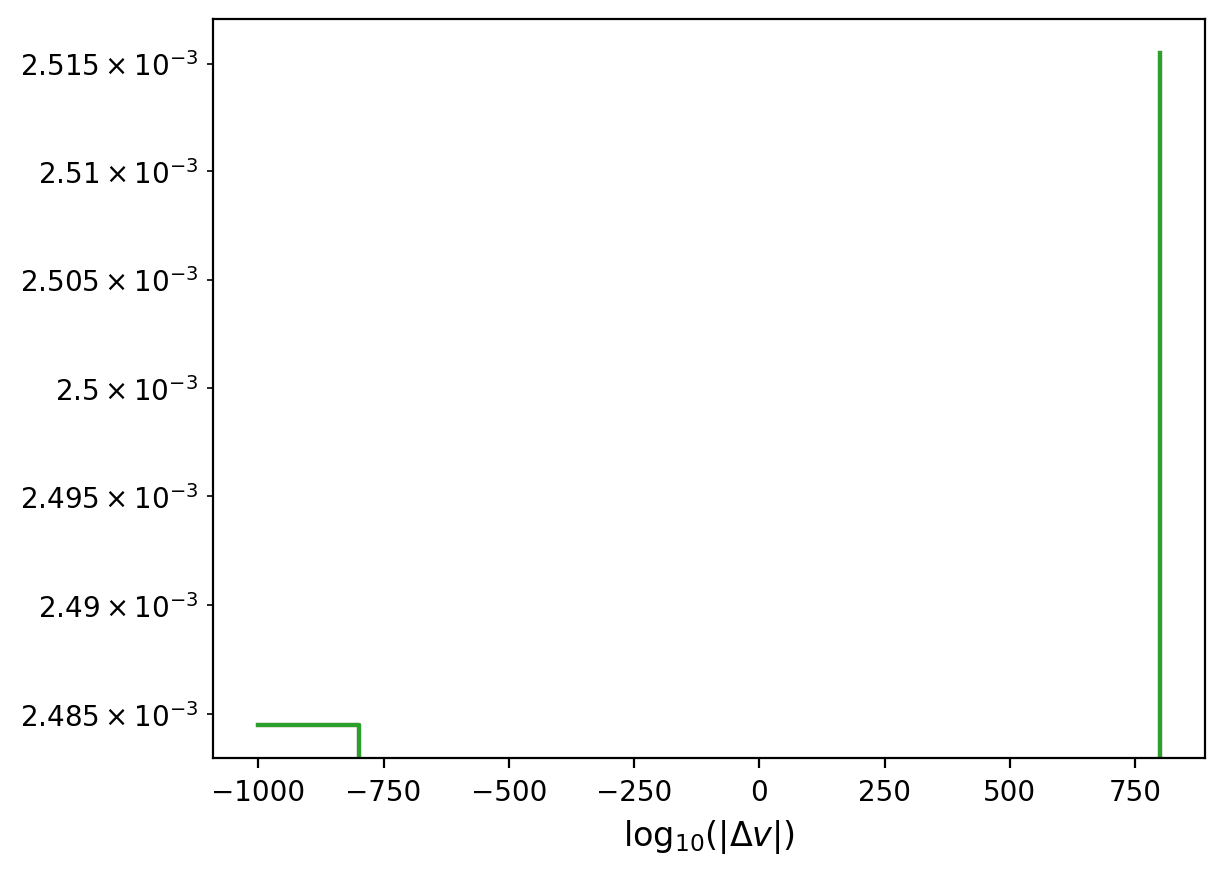

In [ ]:
tracer = 'LRG'
(zmin, zmax) = REDSHIFT_VSMEAR[tracer][0]
fn = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}/obs_z{zmin}-{zmax}/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_{tracer}_z{zmin}-{zmax}_velbias_B_s_mockcov.fits'
catalog=Table(fitsio.read(fn))

dz = catalog['z_dv']- catalog['z']
n1, bin_edges = np.histogram(dz, density= True)
plt.semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
plt.xlabel(r'$\log_{10}(|v|)$')

(zmin, zmax) = REDSHIFT_VSMEAR[tracer][1]
fn = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}/obs_z{zmin}-{zmax}/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_{tracer}_z{zmin}-{zmax}_velbias_B_s_mockcov.fits'
catalog=Table(fitsio.read(fn))

dz = catalog['z_dv']- catalog['z']
n1, bin_edges = np.histogram(dz, density= True)
plt.semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
plt.xlabel(r'$\log_{10}(|v|)$')

(zmin, zmax) = REDSHIFT_VSMEAR[tracer][2]
fn = f'/pscratch/sd/s/shengyu/galaxies/catalogs/cosmosim/AbacusHOD_mocks_v1/CubicBox/{tracer}/obs_z{zmin}-{zmax}/AbacusSummit_base_c000_ph000/catalog_rsd_xi2d_{tracer}_z{zmin}-{zmax}_velbias_B_s_mockcov.fits'
catalog=Table(fitsio.read(fn))

dz = catalog['z_dv']- catalog['z']
n1, bin_edges = np.histogram(dz, density= True)
plt.semilogy(bin_edges[:-1], n1, drawstyle='steps-post')
plt.xlabel(r'$\log_{10}(|\Delta v|)$')